**Ce notebook est une copie de Prosper_clust_ML**

Les réglages des ngram et min max df sont différents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import spacy

from featuring.functions import describedf, StringAnalyzer, WebSiteListAnalyser, MergeDFAndComputeFeature
from featuring.machinelearning import MachineLearning

In [2]:
# import sys
# !{sys.executable} -m pip install -U spacy_langdetect
# !{sys.executable} -m spacy download en_core_web_md
# !{sys.executable} -m spacy download fr_core_news_md

#  Charger les data set

In [3]:
#%% load df
dfjson=pd.read_json("data\\bing_results.json")
df=pd.read_csv("data\\prop_wiki.csv")

# Class MergeDFAndComputeFeature

### Instancier la classe avec les 2 tableaux de données ‘snippet’ et ‘wiki’
*Method: .instantiate_df()*
### Nettoyer les adresses
*Method: .clean_address()*
### Calculer les features (ndot, nwords, bothnumsandwords)
*Method: .mergedf()*


In [4]:
#%% merge and compute features
mdf2=MergeDFAndComputeFeature(df1=dfjson, df2=df)
print(mdf2)

# load df1 & df2 within class
mdf2.instantiate_df()

# remove www. before computing features
mdf2.clean_adress()

# merge df & compute feature
mdf2.mergedf()

------------------------------------

shape is nrow:12975 and ncol:4 

      count_occur                               origin_query  \
0               2                extrudeuse machine learning   
1               2                extrudeuse machine learning   
10              1                extrudeuse machine learning   
100             2                extrudeuse machine learning   
1000            1  test inspection product testing recording   

                                                snippet  \
0     Advanced Manufacturing Agritech Aviation Maint...   
1     ANT Smart Factory is a user-friendly system, w...   
10    Technical Learning. How to wire an RTD and get...   
100   Understanding Swiss-Type Machining. Once seen ...   
1000  This test results in an enumeration of the tot...   

                         url  
0                amatrol.com  
1            antsolutions.eu  
10              in.omega.com  
100        www.mmsonline.com  
1000  www.foodtestinglab.com   

t

C:\Users\xavier\Documents\Prosper\featuring\functions.py:51: UserWarning: extension is not available for IP
  warnings.warn('extension is not available for IP')


### Pre processer les snippet pour le NLP
*Method: .nlp_preprocess(self, stop_fr=None, stop_en=None)*

Retire les ///, mets en minuscule, determine la langue, retire les stopwords, lemmatize

Possibilité d’ajouter des stop_words définis par l’utilisateur


In [5]:
#%% preprocess for NLP
mdf2.nlp_preprocess(stop_fr=None, stop_en=None)

raw french stopwords list loaded
raw english stopwords list loaded
--- waiting 3 seconds ---
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
la

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
langu

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is en
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fa
identified language is neither english nor french
language is fa
identified language is neither english nor french
language is fr
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is fr
language is en
language is en
language is en
language is fr
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is fr
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
langu

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is pl
identified language is neither english nor french
language is fr
language is en
language is en
language is it
identified language is neither english nor french
language is fr
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr


language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is fr
language is en
language is fr
language is en
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
langu

language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is da
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language i

### Effectuer le NLP
*Method: .nlp_process(self,lang='fr',**kwargs)*

Choix d’une langue

Possibilité d’ajuster les ngram et les min max df

Calcule les tfidf



In [6]:
#%% process for NLP
mdf2.nlp_process(lang='fr', min_df=30, max_df=2000, ngram_range=(1,3))

ngram_range is set to: (1, 3)
max_df is set to: 2000
min_df is set to: 30
chosen language is French
tfidf computed, see tfidf & tfidf_features attributes


Réglages actuels:
- Ngram (1,3)
- min_df (50)
- max_df (2000)

#### Questions:

Quels sont les *meilleurs* hyperparamètres (ngram, min/max df) ?

### Preparer les data set
*Method: .preparedataset(self, add_user_feature=True)*

Définies le tableau de features dfX et celui de la variable cible dfy (‘wiki’)

Possbilité d’ajouter les features définies par l’utilisateur ‘ndot’ et ‘bothnumsandswords’


In [7]:
#%% prepare data set
mdf2.preparedataset(add_user_feature=False)



data set prepared with only: 
 -tfidf features

Shape is: 
 -nrow: 8111 
 -ncol: 1448

 ------ data set ready ------



# Class MachineLearning

### Instancier la class avec les dataframe dfX et dfy
### Créer les jeux de données train & test
*Method: .split_data()*
### Possibilité de faire une PCA:
*Method: .do_pca()*

Si data set déjà divisé en train/ test .fit_transform(train) →  .transform(test) sinon .fit_transform(dfX)


In [8]:
#%% ML
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

# ml.do_pca() #optional


data were splitted with parameters: 
 -test_size: 0.5


### Instancier le classifier
*Method: .instantiate_classif()*

Choix entre random forest, logistic regression, naive bayes

Principaux hyperparamètres accessibles

### Entrainer le classifier et afficher le score et matrice de confusion
*Method: .fit_classif()*


**Classification : peut on prédire quels websites ont une page wikipedia ?**

In [9]:
ml.instantiate_classif(classifier='lr',
                       max_depth=15,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=3,
                       solver=None
                       )
ml.fit_classif()


 Classifier is logistic regression 

 hyperparameters are: 
 -C: 3
 -penalty: none
 -solver: lbfgs


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



 Score is 0.874
Confusion matrix is 
 [[3485  259]
 [ 254   58]]


#### Bilan

- Mauvais score

Il est difficile de prédire quels website ont une page wikipedia

### Clustering
*Method: .do_dbscan()*

Pour le dbscan existe une methode *.find_dbscan()* qui recherche parmi plusieurs metriques et plusieurs eps la proportion d’individus (de lignes) assignée au groupe Erreur ou à un seul cluster

Principaux paramètres accessibles

*Method: .do_kmeans()*

Pour le kmeans existe une methode *.find_kmeans()* qui affiche le résultat de la méthode de Pham pour déterminer le nombre idéal de cluster

Voir ici pour le détail: [github Pham]( https://github.com/Vonatzki/pham_dimov_python/blob/master/Pham-Dimov%20Python%20Implementation.ipynb)


-----------------------------------------------
metrics tested will be: 
 ['jaccard', 'sqeuclidean', 'chebyshev']
-----------------------------------------------
eps tested will be: 
 [0.01, 0.1, 1, 10]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: sqeuclidean and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebyshev and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebysh

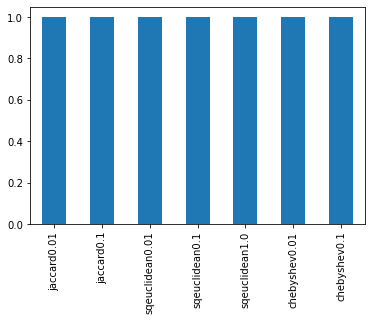

Number of dimensions detected: 1448

CENTROID 1 || sk: 7958.903519739251	fk: 1.0	a: None
CENTROID 2 || sk: 7896.093188515974	fk: 0.9926223022609775	a: 0.9994820441988951
CENTROID 3 || sk: 7856.52148242996	fk: 0.9954180970486186	a: 0.9995683701657458
CENTROID 4 || sk: 7821.283291213617	fk: 0.9958729916693292	a: 0.9996403084714549
CENTROID 5 || sk: 7789.101347746232	fk: 0.9961839362945287	a: 0.9997002570595458
CENTROID 6 || sk: 7757.152835296332	fk: 0.99614712911063	a: 0.9997502142162882
CENTROID 7 || sk: 7726.877974123882	fk: 0.9963045539999138	a: 0.9997918451802401
CENTROID 8 || sk: 7696.170568982193	fk: 0.9961987004587097	a: 0.9998265376502001
CENTROID 9 || sk: 7666.09275708742	fk: 0.9962358548699818	a: 0.9998554480418335
CENTROID 10 || sk: 7643.925696246383	fk: 0.997228553898312	a: 0.9998795400348612


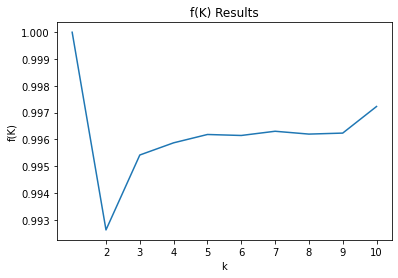


 ------ dbscan clustering done ------

{-1: 109, 0: 8002}

------row: dbscan, col: wiki------
col_0   0.0  1.0
row_0           
-1      108    1
 0     7381  621



------row: kmeans, col: wiki------
col_0   0.0  1.0
row_0           
0      6643  580
1       846   42



------row: dbscan, col: kmeans------
col_0     0    1
row_0           
-1      102    7
 0     7121  881



 N of website in each cluster (KMEANS)

0    7223
1     888
Name: 0, dtype: int64


In [10]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

if True:
    ml.find_dbscan(metrics=['jaccard','sqeuclidean', 'chebyshev'], eps=[0.01,0.1,1,10], min_samples=4)

if True:
    ml.find_kmeans(max_k = 10)


ml.do_kmeans(nK=2)

ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
unique, counts = np.unique(ml.dfy_db, return_counts=True)
print(dict(zip(unique, counts)))

print('\n------row: dbscan, col: wiki------')
print(pd.crosstab(ml.dfy_db, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: kmeans, col: wiki------')
print(pd.crosstab(ml.dfy_kmeans, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: dbscan, col: kmeans------')
print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
cluster_dbscan=pd.DataFrame(ml.dfy_db)

print('\n N of website in each cluster (KMEANS)\n')
print(cluster_kmeans[0].value_counts())

In [11]:
# just for reload clustering

# ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)
# ml.do_kmeans(nK=2)
# cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)

#### Bilan:
- dbscan ne fonctionne pas, quelle que soit la métrique utilisée
- léger avantage pour k=2 avec le kmeans
- pas de lien a priori entre la variable wiki et les 2 clusters identifiés par Kmeans


# Machine learning & Clustering

###  Logistic Regression

In [12]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 0.997
Confusion matrix is 
 [[3609    9]
 [   4  434]]

pca done?  False


#### Bilan:
- bon score du classifier sur le testing set sur les clusters identifiés par kmeans

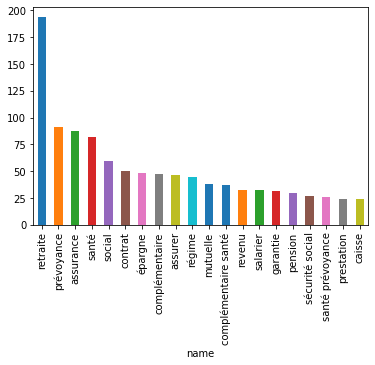

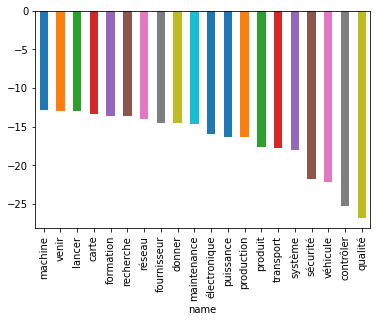

In [13]:
#%%
coef_lr=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.coef_[0].ravel())})

# print(coef_lr.sort_values('coef', ascending = False)[0:20])
# print(coef_lr.sort_values('coef', ascending = False)[-20::])

coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].plot.bar()
plt.show()

#### Bilan



### Random Forest

In [14]:
#%% ML with kmeans clusters 

ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='rf',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=1000,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is random forest 

 hyperparameters are: 
 -n_estimators: 1000
 -max_depth: 4
 -class_weight: balanced_subsample

 Score is 0.984
Confusion matrix is 
 [[3583   35]
 [  31  407]]

pca done?  False


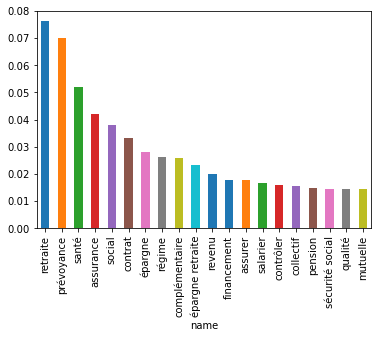

In [15]:
coef_rf=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.feature_importances_.ravel())})

# print(coef_rf.sort_values('coef', ascending = False)[0:20])

coef_rf.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()

# Analyses complémentaires

In [16]:
ax_X=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=1)
ax_Y=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=1)

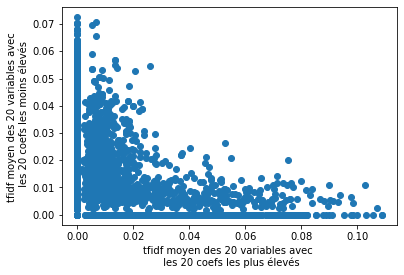

In [17]:
plt.scatter(ax_X,ax_Y)
plt.xlabel('tfidf moyen des 20 variables avec \n les 20 coefs les plus élevés')
plt.ylabel('tfidf moyen des 20 variables avec \n les 20 coefs les moins élevés')
plt.show()

In [18]:
mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0)

retraite                0.018584
prévoyance              0.009342
assurance               0.010925
santé                   0.019063
social                  0.009498
contrat                 0.005612
épargne                 0.005786
complémentaire          0.004783
assurer                 0.010361
régime                  0.004957
mutuelle                0.003927
complémentaire santé    0.002325
revenu                  0.003250
salarier                0.005573
garantie                0.003845
pension                 0.002961
sécurité social         0.002838
santé prévoyance        0.002395
prestation              0.004041
caisse                  0.003642
dtype: float64

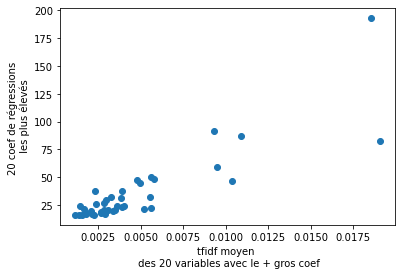

In [19]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40])
plt.xlabel('tfidf moyen \n des 20 variables avec le + gros coef')
plt.ylabel('20 coef de régressions \n les plus élevés')
plt.show()

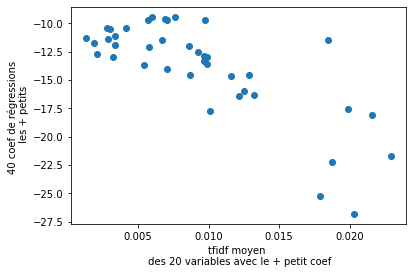

In [20]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::])
plt.xlabel('tfidf moyen \n des 20 variables avec le + petit coef')
plt.ylabel('40 coef de régressions \n les + petits')
plt.show()

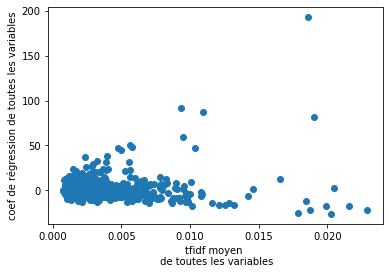

In [21]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef)
plt.ylabel('coef de régression de toutes les variables')
plt.xlabel('tfidf moyen \n de toutes les variables')
plt.show()

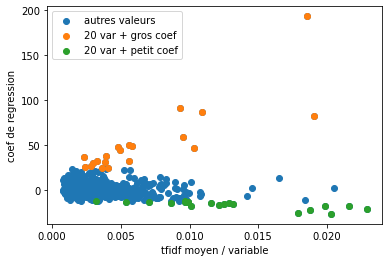

In [22]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef, label='autres valeurs')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], label='20 var + gros coef')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::], label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

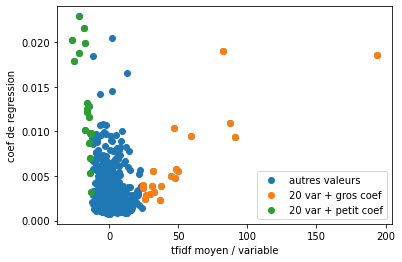

In [23]:
plt.scatter(coef_lr.coef,mdf2.dfX.mean(axis=0), label='autres valeurs')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], 
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
            label='20 var + gros coef')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::],
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
            label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

In [24]:
mot_cluster = pd.concat([pd.Series(mdf2.df_merged[mdf2.df_merged['language']=='fr'].url).reset_index(drop=True), cluster_kmeans.reset_index(drop=True)],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [25]:
mot_cluster.head()

,mot,cluster
0,www.ratp.fr,0
1,www.ratp.fr,0
2,www.ratp.fr,0
3,www.ratp.fr,0
4,www.ratp.fr,0


In [26]:
mot_cluster.shape

(8111, 2)

In [27]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot                                        
0        194.214.100.224:8090                           1
         1951.polytechnique.org                         1
         224business.net                                1
         360learning.com                                1
         3dmodularsystems.com                           2
         3m.loreval.fr                                  1
         94.citoyens.com                                1
         99designs.fr                                   1
         a190754.free.fr                                1
         aa-boschap-fr.resource.bosch.com               1
         aaa.public.lu                                  1
         aalberts-website.s3.eu-west-1.amazonaws.com    1
         abovas.com                                     1
         abylsen.com                                    1
         ac-prevention.fr                               1
         accesidentite.com                              1
         account.an

In [28]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
0,www.ratp.fr,0
4950,www.formations-journee-securite.fr,0
4949,www.formation-dekra.fr,0
4948,www.food-security.net,0
4947,www.fondationdelaroute.fr,0
4946,www.fonction-publique.gouv.fr,0
4943,www.fntp.fr,0
4942,www.fidea.be,0
4941,www.fictis-prevention.com,0
4940,www.ffs.fr,0


In [29]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 0]

['www.ratp.fr',
 'www.remorquerolland.com',
 'www.renault.fr',
 'www.safran-group.com',
 'www.scoop.developpement-durable.gouv.fr',
 'www.scopex.fr',
 'www.se.com',
 'www.seat.fr',
 'www.senat.fr',
 'www.senseofwellness-mag.com',
 'www.service-public.fr',
 'www.setam.com',
 'www.sieeen.orios-infos.com',
 'www.skoda.fr',
 'www.smart.com',
 'www.societegenerale.com',
 'www.sojadis.com',
 'www.steyr-traktoren.com',
 'www.stone-wash.fr',
 'www.sydec40.fr',
 'www.tam-surplus.fr',
 'www.tcp-quad.com',
 'www.techno-science.net',
 'www.telip.fr',
 'www.tesla.com',
 'www.thebusinessplanshop.com',
 'www.thema-radiologie.fr',
 'www.tilt-equipement.com',
 'www.toro-distribution.com',
 'www.toro.com',
 'www.total.fr',
 'www.toyota.fr',
 'www.trakto.ca',
 'www.transportissimo.com',
 'www.tresor.economie.gouv.fr',
 'www.truck.man.eu',
 'www.truckchocdiscount.com',
 'www.ugap.fr',
 'www.gov.mb.ca',
 'www.universfreebox.com',
 'www.unoosa.org',
 'www.us-militaria.com',
 'www.usine-digitale.fr',
 'www.u

In [30]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 1]

['www.mutuelledesmotards.fr',
 'www.boursorama-banque.com',
 'www.resilier.com',
 'www.aon.com',
 'www.ash.tm.fr',
 'www.s2hgroup.com',
 'www.urssaf.fr',
 'www.securite-sociale.fr',
 'www.allianz.fr',
 'www.credit-suisse.com',
 'sante.cgt.fr',
 'entreprises.carsat-aquitaine.fr',
 'www.sante-securite-interim.fr',
 'assurance-maladie.ameli.fr',
 'commerce.gov.dz',
 'www.ars.sante.fr',
 'www.brunet.ca',
 'www.covid19-pressepro.fr',
 'www.gan.fr',
 'www.health.gov.on.ca',
 'www.igas.gouv.fr',
 'www.maaf.fr',
 'www.ps-ecublens.ch',
 'www.smatis.fr',
 'www.topsante.com',
 'particuliers.henner.com',
 'www.antinea-courtage.fr',
 'www.carcept-prev.fr',
 'www.carsat-aquitaine.fr',
 'www.carsat-ra.fr',
 'www.complementaire-sante-solidaire.gouv.fr',
 'www.dispofi.fr',
 'www.fastt.org',
 'www.guide-vue.fr',
 'www.mcommemutuelle.com',
 'www.meilleurtaux.com',
 'www.mgen.fr',
 'www.mutuelle-mgs.com',
 'www.secu-independants.fr',
 'www.togi-sante.com',
 'www.uff.net',
 'agora.presenca.fr',
 'blog.migr

Cluster 1: beaucoup d'assurances là dedans

# Classif & Clustering avec le data frame transposé

**Objectif**: regrouper les mots associés

**Bilan:** 

In [34]:
col_name=mdf2.df_merged[mdf2.df_merged['language']=='fr'].url

In [35]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=pd.DataFrame({'fake':range(0,mdf2.dfX.shape[1])}))
ml.do_pca(n_components=2)


dataset was NOT splitted, applying pca on dfX


In [36]:
ml.dfX

array([[-0.11561863, -0.01205261],
       [-0.11924452,  0.00160632],
       [-0.01871011, -0.12981561],
       ...,
       [ 0.01983784, -0.04032247],
       [-0.10860752,  0.01631355],
       [ 0.1277198 , -0.03080279]])


-----------------------------------------------
metrics tested will be: 
 ['euclidean']
-----------------------------------------------
eps tested will be: 
 [0.05, 0.5, 5]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: euclidean and 
 -eps: 5


    eps     metric  Percentage_Err_Grp1
0  0.05  euclidean             0.990331
0  0.50  euclidean             1.000000

--------------------------------------------------

Percentage_Err_Grp1 represents the proportion of rows assignated either to Error group or to only One cluster by dbscan 
High ratio indicates non consistent clustering



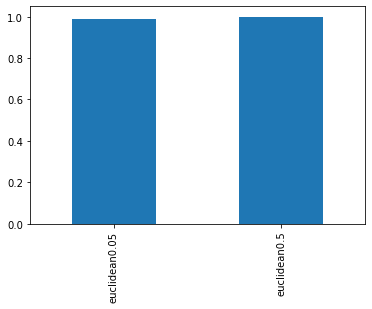

Number of dimensions detected: 2

CENTROID 1 || sk: 173.74569209446923	fk: 1.0	a: None
CENTROID 2 || sk: 118.92584285860735	fk: 1.095171605580366	a: 0.625
CENTROID 3 || sk: 81.70551662297568	fk: 0.9993150770142798	a: 0.6875
CENTROID 4 || sk: 59.40380701714233	fk: 0.9830503960279265	a: 0.7395833333333334
CENTROID 5 || sk: 44.70804004782332	fk: 0.9612078175556057	a: 0.7829861111111112
CENTROID 6 || sk: 38.85491053354838	fk: 1.0609481172855233	a: 0.8191550925925927
CENTROID 7 || sk: 33.133084900061434	fk: 1.0040536682277619	a: 0.8492959104938272
CENTROID 8 || sk: 28.387374008237476	fk: 0.9798207042960936	a: 0.8744132587448561
CENTROID 9 || sk: 25.64751211692038	fk: 1.0090900198812975	a: 0.8953443822873801
CENTROID 10 || sk: 22.0202474953395	fk: 0.9406054982484955	a: 0.9127869852394834
CENTROID 11 || sk: 20.062397625287012	fk: 0.9824938626043023	a: 0.9273224876995695
CENTROID 12 || sk: 17.982256370883746	fk: 0.954101167173098	a: 0.939435406416308
CENTROID 13 || sk: 16.535272299012327	fk: 0

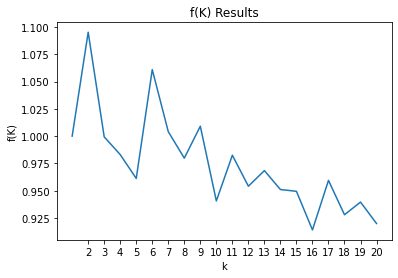

In [37]:
if True:
    ml.find_dbscan(metrics=['euclidean'], eps=[0.05, 0.5, 5], min_samples=5)

if True:
    ml.find_kmeans(max_k = 20)



In [38]:
ml.do_kmeans(nK=5)

# ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
# unique, counts = np.unique(ml.dfy_db, return_counts=True)
# print(dict(zip(unique, counts)))


# print('\n------row: dbscan, col: kmeans------')
# print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
# print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
# cluster_dbscan=pd.DataFrame(ml.dfy_db)

In [39]:
pd.Series(cluster_kmeans[0]).value_counts()

0    1199
3     157
2      74
1      14
4       4
Name: 0, dtype: int64

In [40]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=cluster_kmeans)
ml.do_pca(n_components=2)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


dataset was NOT splitted, applying pca on dfX

data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 1.000
Confusion matrix is 
 [[607   0   0   0   0]
 [  0   1   0   0   0]
 [  0   0  43   0   0]
 [  0   0   0  72   0]
 [  0   0   0   0   1]]

pca done?  True


In [41]:
pd.DataFrame(ml.dfX).head()

,0,1
0,-0.115650,-0.012010
1,-0.119244,0.001614
2,-0.018568,-0.129984
3,0.201100,0.310244
4,-0.065492,0.072177


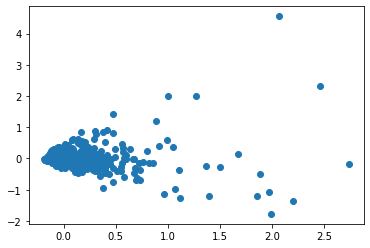

In [42]:
plt.scatter(pd.DataFrame(ml.dfX)[0],pd.DataFrame(ml.dfX)[1])

In [43]:
mot_cluster = pd.concat([pd.Series(mdf2.dfX.T.index), cluster_kmeans],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [44]:
mot_cluster.shape

(1448, 2)

In [45]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot           
0        accepter          1
         accessible        1
         accessoire        1
         accompagnement    1
         accompagner       1
         accord            1
         accorder          1
         accueil           1
         accéder           1
         achat             1
         acheter           1
         acquis            1
         acquisition       1
         acte              1
         acteur            1
         actif             1
         action social     1
         active            1
         actualité         1
         actuel            1
         actuellement      1
         adapter besoin    1
         adapté            1
         adhérent          1
         administratif     1
         administration    1
         adopter           1
         adresse           1
         affairer          1
         affichage         1
                          ..
3        secteur           1
         site              1
         société   

In [46]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
0,accepter,0
921,parcours,0
920,parcourir,0
919,parc,0
918,paramètre,0
917,panneau,0
916,panne,0
915,paiement,0
922,parfait,0
914,page,0


In [47]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 0]

['accepter',
 'accessible',
 'accessoire',
 'accompagnement',
 'accompagner',
 'accord',
 'accorder',
 'accueil',
 'accéder',
 'achat',
 'acheter',
 'acquis',
 'acquisition',
 'acte',
 'acteur',
 'actif',
 'action social',
 'active',
 'actualité',
 'actuel',
 'actuellement',
 'adapter besoin',
 'adapté',
 'adhérent',
 'administratif',
 'administration',
 'adopter',
 'adresse',
 'affairer',
 'affichage',
 'afficher',
 'agence',
 'agencer',
 'agent',
 'agir',
 'agricole',
 'agréer',
 'air',
 'ajouter',
 'alarme',
 'alerte',
 'algorithme',
 'aliment',
 'alimentaire',
 'alimentation',
 'allant',
 'aller',
 'allocation',
 'amélioration',
 'aménagement',
 'américain',
 'analyser',
 'ancien',
 'and',
 'anglais',
 'animal',
 'annonce',
 'annoncer',
 'annuel',
 'anticiper',
 'apparaître',
 'appel',
 'appeler',
 'appelé',
 'applicable',
 'appliquer',
 'apporter',
 'apprendre',
 'apprentissage',
 'approche',
 'approvisionnement',
 'appuyer',
 'architecture',
 'argent',
 'arme',
 'armement',
 'arm

In [52]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 1]

['contrôler',
 'entreprise',
 'maintenance',
 'permettre',
 'pouvoir',
 'production',
 'produit',
 'qualité',
 'service',
 'solution',
 'système',
 'sécurité',
 'véhicule',
 'électronique']

In [49]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 2]

['accident',
 'action',
 'aide',
 'aider',
 'article',
 'assurance retraite',
 'assurer',
 'bénéficier',
 'cadre',
 'caisse',
 'capital',
 'cas',
 'code',
 'collectif',
 'complémentaire',
 'complémentaire santé',
 'compte',
 'condition',
 'conseil',
 'contrat',
 'cotisation',
 'droit',
 'décès',
 'départ',
 'employeur',
 'epargne',
 'epargne retraite',
 'famille',
 'financement',
 'financier',
 'frais',
 'garantie',
 'individuel',
 'loi',
 'madelin',
 'maladie',
 'montant',
 'mutuelle',
 'numéro',
 'obligatoire',
 'pension',
 'personnel',
 'plan',
 'prestation',
 'professionnel',
 'protection',
 'protection social',
 'protéger',
 'préparer',
 'prévention',
 'public',
 'rente',
 'retraite complémentaire',
 'retraite prévoyance',
 'retraiter',
 'revenu',
 'risque',
 'réduire',
 'réforme',
 'régime',
 'salarier',
 'santé prévoyance',
 'santé sécurité',
 'secours',
 'situation',
 'social',
 'soin',
 'sécurité social',
 'travail',
 'travailleur',
 'versement',
 'vie',
 'épargne',
 'épargne 

In [50]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 3]

['accès',
 'activité',
 'adapter',
 'améliorer',
 'an',
 'analyse',
 'année',
 'appareil',
 'application',
 'augmenter',
 'automobile',
 'base',
 'baser',
 'besoin',
 'bon',
 'capteur',
 'carte',
 'carte électronique',
 'centre',
 'charge',
 'choix',
 'client',
 'commande',
 'complet',
 'composant',
 'conception',
 'concevoir',
 'conduite',
 'contrôler accès',
 'contrôler qualité',
 'coût',
 'création',
 'créer',
 'dater',
 'devoir',
 'document',
 'domaine',
 'donner',
 'dynamique',
 'découvrir',
 'défense',
 'démarcher',
 'développement',
 'développer',
 'effectuer',
 'ensemble',
 'entrer',
 'environnement',
 'exemple',
 'exigence',
 'exportation',
 'expérience',
 'fabrication',
 'faire',
 'fonction',
 'formation',
 'fournir',
 'fournisseur',
 'france',
 'français',
 'gamme',
 'garantir',
 'gestion',
 'grand',
 'groupe',
 'grâce',
 'incendie',
 'industrie',
 'industriel',
 'information',
 'informatique',
 'installation',
 'intégration',
 'jour',
 'lancement',
 'lancer',
 'large',
 'li

In [51]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 4]

['assurance', 'prévoyance', 'retraite', 'santé']